# Testy algorytmów rozpoznawania tic-tac-toe

In [1]:
from __future__ import division

import os
import random as rnd

import numpy as np
import scipy as sp
import skimage as ski
from matplotlib import pylab as plt
from pylab import *
from skimage import exposure
from skimage import img_as_float
from skimage import io, filters
from skimage import measure
from skimage import restoration
from skimage.color import rgb2gray
from skimage.color import rgb2hed
from skimage.morphology import remove_small_objects

### 1. mierzenie solidity dla obiektów rozpoznawanych na obrazie

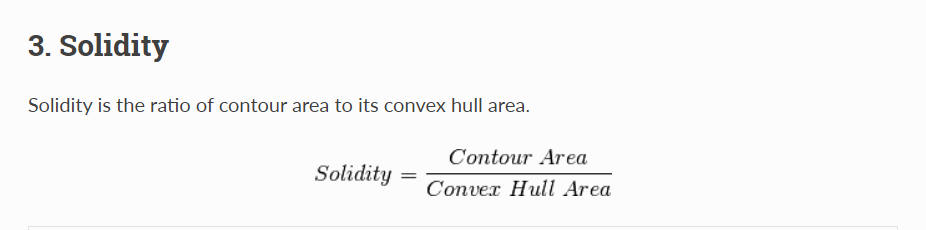
Przy użyciu skimage.measure.regionprops: https://scikit-image.org/docs/dev/api/skimage.measure.html

In [2]:
def prepare_img(img):
    ihc_hed = rgb2hed(img)
    h = exposure.rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1))
    d = exposure.rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
    zdh = np.dstack((np.zeros_like(h), d, h))
    tmp = rgb2gray(zdh)
    p0_5, p99_5 = np.percentile(tmp, (0.5, 99.5))
    tmp = exposure.rescale_intensity(tmp, (p0_5, p99_5))
    tmp = filters.prewitt(tmp)
    tmp = restoration.denoise_nl_means(tmp, h=0.95, fast_mode=True, patch_size=3, patch_distance=7, multichannel=False)
    return tmp


def thresh_img(img):
    tmp = prepare_img(img)
    binary = (tmp > filters.threshold_minimum(tmp))
    return binary


def outline_img(img):
    tmp = thresh_img(img)
    tmp = filters.prewitt(tmp)
    tmp_outline = filters.sobel(tmp)
    tmp_outline = sp.ndimage.binary_fill_holes(tmp_outline)
    tmp_outline = remove_small_objects(tmp_outline, 10 * 10)
    return tmp_outline

def get_solidity(img):
    tmp = outline_img(img)
    plt.imshow(tmp, cmap = plt.cm.gray)
    outline, count = sp.ndimage.label(tmp)
    props = measure.regionprops(outline)
    solidity  = props[0].solidity
    return solidity

0.9967519204519414


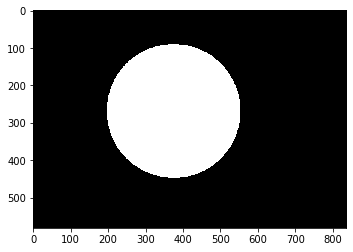

In [3]:
print(get_solidity(io.imread('O.jpg')))
plt.show()

0.07498826841858283


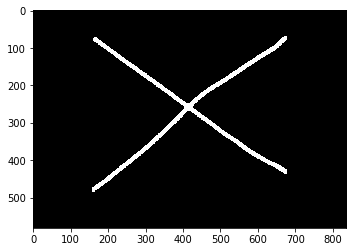

In [4]:
print(get_solidity(io.imread('X.jpg')))
plt.show()

0.2684413525669564


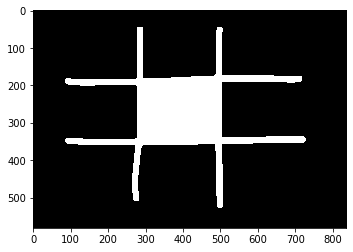

In [5]:
print(get_solidity(io.imread('plansza.jpg')))
plt.show()

### Test wykrytych solidities obiektów na prawdziwym zdjęciu

In [8]:
def show_solidities(img):
    tmp = outline_img(img)
#     plt.imshow(tmp, cmap = plt.cm.gray)
    outlines, count = sp.ndimage.label(tmp)
    outlines = measure.regionprops(outlines)
    for outline in outlines:
        solidity  = outline.solidity
        x1, y1, x2, y2 = outline.bbox
        plt.imshow(tmp[x1:x2, y1:y2])
        plt.show()
        print(solidity)

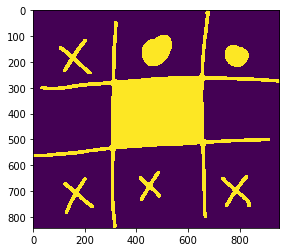

0.21513049979261364


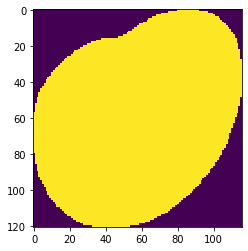

0.9874078910549389


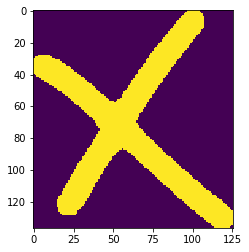

0.3471641791044776


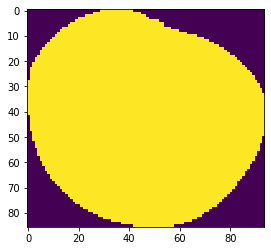

0.9899521531100478


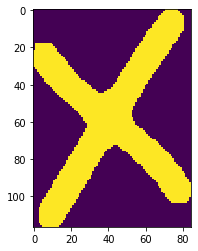

0.4197093229351294


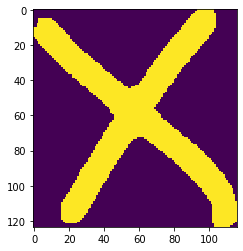

0.35342751645528975


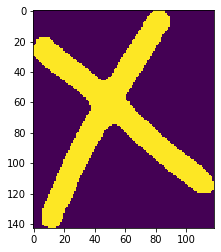

0.343000385653683


In [9]:
show_solidities(io.imread('zdjęcia\łatwe\IMG_6517.jpg'))

### Testy funkcji wykrywania planszy na zdjęciach

In [29]:
def get_solidities(img):
    tmp = outline_img(img)
    outlines, count = sp.ndimage.label(tmp)
    outlines = measure.regionprops(outlines) 
    solidities = []
    boundings = []
    for outline in outlines:
        solidity  = outline.solidity
        solidities.append(solidity)
        x1, y1, x2, y2 = outline.bbox
        boundings.append([(x1, y1), (x2, y2)])
#         plt.imshow(tmp[x1:x2, y1:y2])
    return solidities, boundings
        

def find_game_areas(img):
    solidities, boundings = get_solidities(img)
    solidities = np.array(solidities)
    boundings = np.array(boundings)
    game_areas = boundings[solidities < 0.29]
    return game_areas
    
def show_game_areas(img):
    games = find_game_areas(img)
    for game in games:
        plt.imshow(img[game[0, 0] : game[1, 0], game[0, 1] : game[1, 1]])
        plt.show()

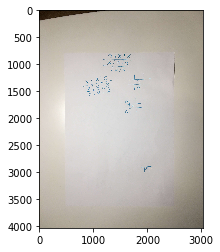

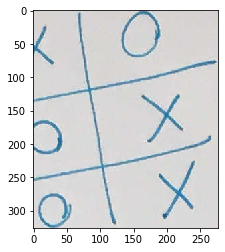

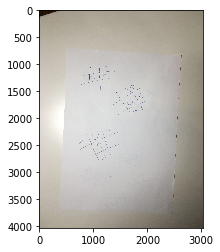

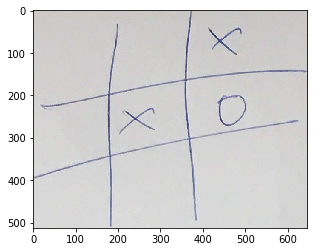

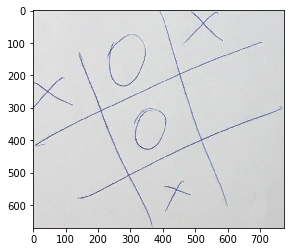

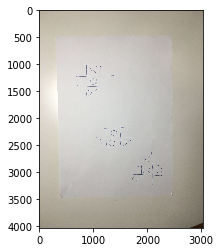

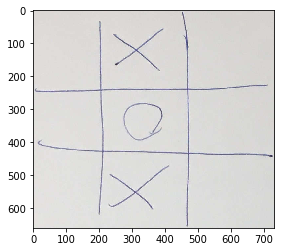

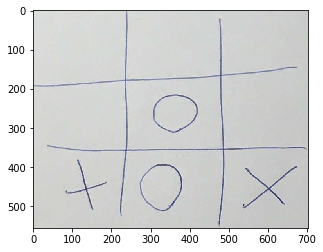

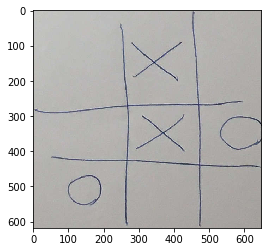

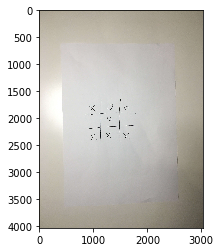

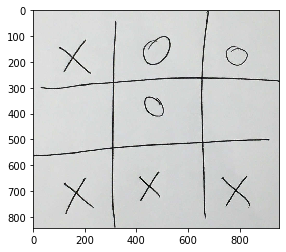

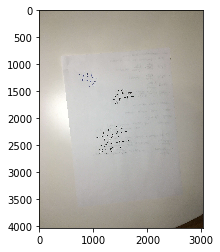

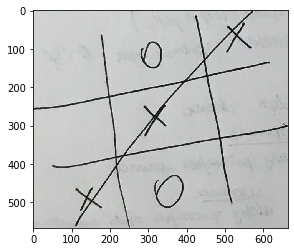

In [30]:
dir = 'zdjęcia\\łatwe\\'
dir_listed = os.listdir(dir)    # lista plików w folderze

for img_name in dir_listed:
    img = io.imread(os.path.join(dir, img_name))
    plt.imshow(img)
    plt.show()
    show_game_areas(img)


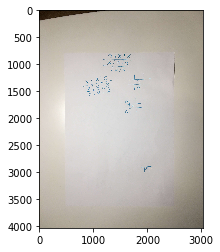

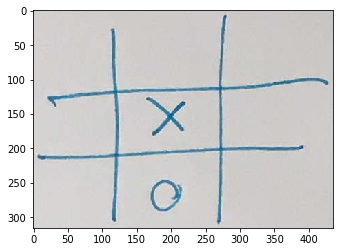

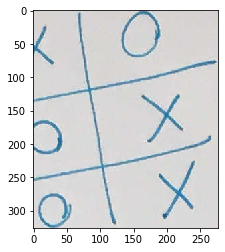

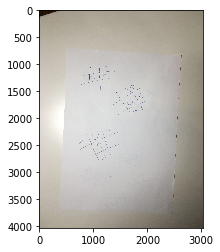

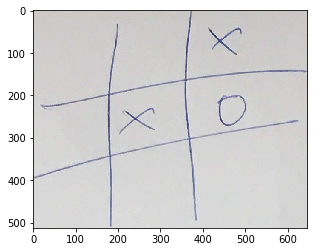

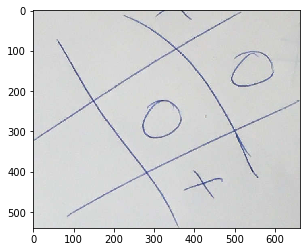

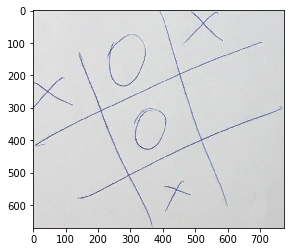

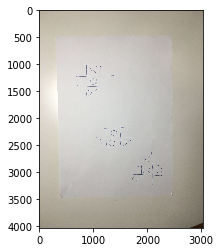

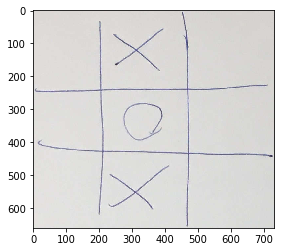

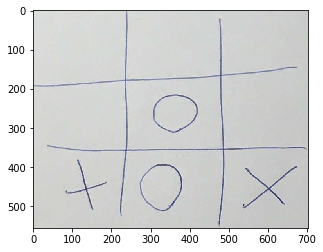

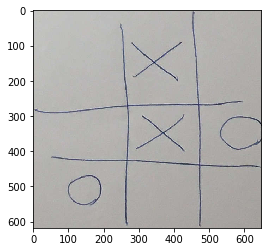

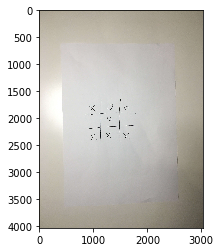

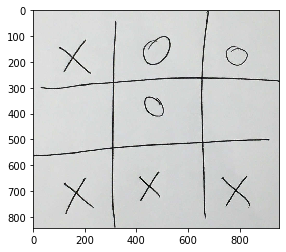

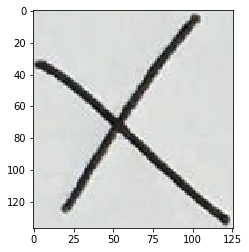

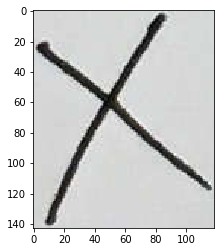

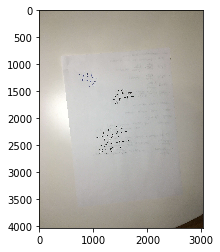

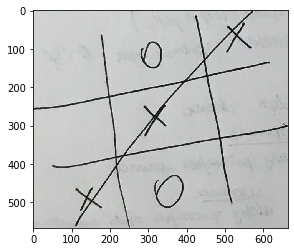

In [33]:
def find_game_areas(img):
    solidities, boundings = get_solidities(img)
    solidities = np.array(solidities)
    boundings = np.array(boundings)
    game_areas = boundings[solidities < 0.35]
    return game_areas

dir = 'zdjęcia\\łatwe\\'
dir_listed = os.listdir(dir)    # lista plików w folderze

for img_name in dir_listed:
    img = io.imread(os.path.join(dir, img_name))
    plt.imshow(img)
    plt.show()
    show_game_areas(img)


### Testy wykrywania krawędzi na prawdziwych zdjęciach

In [ ]:
plt.imshow(outline_img(io.imread('zdjęcia\łatwe\IMG_6517.jpg')))
plt.show()